In [3]:
import json
import matplotlib.pyplot as plt
import os, sys

In [4]:
# GPT-4 with nudges

wn_p_lf_1 = open("../logs/loopy_2023_08_25_13_54_09/final_rechecked_re_filtered.json", "r", encoding="utf-8")
wn_p_l = json.load(wn_p_lf_1)
wn_p_l = wn_p_l["logs"]
wn_p_lf_1.close()
wn_p_lf_2 = open("../logs/loopy_2023_08_13_23_52_42/final_rechecked_rechecked_re_filtered.json", "r", encoding="utf-8")
wn_p_l_2 = json.load(wn_p_lf_2)
wn_p_l_2 = wn_p_l_2["logs"]
wn_p_lf_2.close()


wn_success = []
wn_success_with_prune = []
for c5, c10 in zip(wn_p_l, wn_p_l_2):
    if "completions" in c5:
        if (c5["checker_output"]):
            wn_success.append(c5["file"])
            continue
        if (c5["checker_output_after_combine_and_prune"]):
            wn_success_with_prune.append(c5["file"])
            continue
    if "completions" in c10:
        if (c10["checker_output"]):
            wn_success.append(c10["file"])
            continue
        if (c10["checker_output_after_combine_and_prune"]):
            wn_success_with_prune.append(c10["file"])
            continue

In [5]:
wn_success_with_qual_analysis = [
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loops/while_infinite_loop_1.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loops/while_infinite_loop_2.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-acceleration/overflow_1-1.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/even.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/mod4.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/odd.c",
       
]
wn_success_with_qual_analysis_with_prune = [
    "../new_benchmarks/original_benchmarks/accelerating_invariant_generation/crafted/overflow_safe1.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loops/sum03-2.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loops-crafted-1/vnew2.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-lit/ddlm2013.c",
    "../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-lit/ddlm2013_true-unreach-call.c"

]

In [6]:
final_wn_success = wn_success + wn_success_with_qual_analysis
final_wn_success_with_prune = wn_success_with_prune + wn_success_with_qual_analysis_with_prune

In [7]:
gpt_35_log_file = open("../logs/loopy_2023_09_24_21_35_45/final.json", "r", encoding="utf-8")
gpt_35_logs = json.load(gpt_35_log_file)
gpt_35_log_file.close()

In [8]:
gpt_35_success = []
gpt_35_success_with_prune = []

for c in gpt_35_logs["logs"]:
    if "completions" in c:
        if (c["checker_output"]):
            gpt_35_success.append(c["file"])
            continue
        if (c["checker_output_after_combine_and_prune"]):
            gpt_35_success_with_prune.append(c["file"])
            continue

In [9]:
codellama_file = open("../logs/loopy_2023_09_25_08_57_18/final.json", "r", encoding="utf-8")
codellama_logs = json.load(codellama_file)
codellama_file.close()

In [10]:
codellama_success = []
codellama_success_with_prune = []

for c in codellama_logs["logs"]:
    if "completions" in c:
        if (c["checker_output"]):
            codellama_success.append(c["file"][0])
            continue
        if (c["checker_output_after_combine_and_prune"]):
            codellama_success_with_prune.append(c["file"][0])
            continue

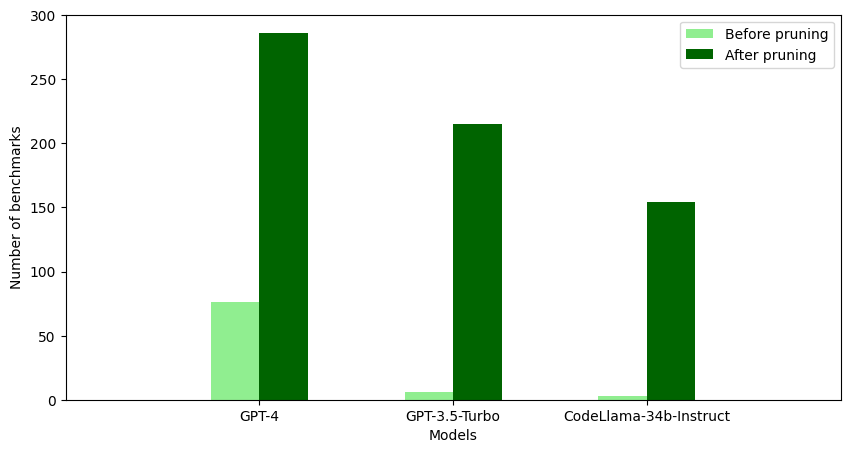

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
# ax.set_title("Number of benchmarks verified")
ax.set_xlabel("Models")
ax.set_ylabel("Number of benchmarks")

ax.bar(0.875, len(final_wn_success), color="lightgreen", width=0.25)
ax.bar(1.125, len(final_wn_success) + len(final_wn_success_with_prune), color="darkgreen", width=0.25)

ax.bar(1.875, len(gpt_35_success), color="lightgreen", width=0.25)
ax.bar(2.125, len(gpt_35_success) + len(gpt_35_success_with_prune), color="darkgreen", width=0.25)

ax.bar(2.875, len(codellama_success), color="lightgreen", width=0.25)
ax.bar(3.125, len(codellama_success) + len(codellama_success_with_prune), color="darkgreen", width=0.25)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["GPT-4", "GPT-3.5-Turbo", "CodeLlama-34b-Instruct"])
ax.set_xlim(0, 4)
ax.legend(["Before pruning", "After pruning"])
plt.savefig("graphs/llm_comparison_with_vs_without_pruning_no_title.png")
plt.show()

In [83]:
wn = (final_wn_success) + (final_wn_success_with_prune)
gpt_35 = (gpt_35_success) + (gpt_35_success_with_prune)
codellama = (codellama_success) + (codellama_success_with_prune)

In [84]:
gpt_35 = [x.replace("../data/", "../") for x in gpt_35]
codellama = [x.replace("../data/", "../") for x in codellama]

In [87]:
len(set(wn).intersection(set(gpt_35)))

153

In [99]:
from matplotlib_venn import venn2_unweighted, venn3_unweighted, venn3

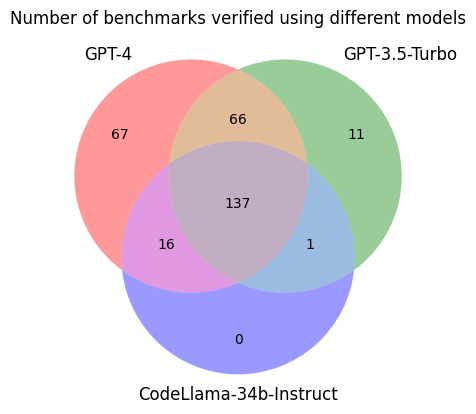

In [113]:
set_wn, set_gpt_35, set_codellama = set(wn), set(gpt_35), set(codellama)
venn3_unweighted([set_wn, set_gpt_35, set_codellama], ("GPT-4", "GPT-3.5-Turbo", "CodeLlama-34b-Instruct"))
plt.title("Number of benchmarks verified using different models")
plt.savefig("graphs/llm_comparison_venn.png")
plt.show()

In [109]:
set(gpt_35).difference(set(wn))

{'../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/VeriMAP/TRACER-testloop17_VeriMAP_true.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-lit/gj2007b_true-unreach-call_true-termination.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/count_by_nondet_true-unreach-call_true-termination.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/half_true-unreach-call_true-termination.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/04.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/22.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/35.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/20.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/35.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/svcomp/sum01_true.c',
 '..